# Alberta Lyme disease surveillance data, 2013-2023

#### Overview
This notebook and GitHub repository were constructed for AI4PH W2025 course 'Tools for Data Science: Notebooks and Versioning'. The final assignment asks participants
> “to demonstrate mastery of the course material [by creating] a Jupyter Notebook that walks through a sample dataset, from data ingestion, basic cleaning, visualization, and calculation of summary statistics.”

#### Data
Lyme disease (Borrelia burgdorferi) is tick-borne pathogen Surveillance programs have been established for human and companion animals. 

This notebook uses tick surveillance data from Alberta Health (https://open.alberta.ca/publications/2369-0690). Specifically, the data for "Ticks capable of transmitting Borrelia burgdorferi (Alberta-acquired)" were exported from the Interactive Health Data Application (IHDA) at http://www.ahw.gov.ab.ca/IHDA_Retrieval/redirectToURL.do?cat=324&subCat=1043


The data include x variables of interest

| Variable | Description |
| ----------- | ---------- |
| Geography | Alberta Health zones |
| Year | Indicator, 2013 through 2023 | 
| Program | Human and environment, companion animal, or both |
| Indicator | Positive ticks, of all ticks or all Lyme-capable ticks |
| Percent | Indicator proportion |
| Count | Indicator numerator |
| Total Ticks | Indicator denominator |

The data also includes 'Travel History', a constant in the data as exported from the IHDA.

In addition to the surveillance data, annual total population estimates (aggregated at the Health regions) were exported from the IDHA (http://www.ahw.gov.ab.ca/IHDA_Retrieval/redirectToURL.do?cat=5&subCat=63). 

#### Set up and importing data
Packages and data are imported.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## read in data
df = pd.read_csv('tick_data_IHDAexport.csv')
df_pop = pd.read_csv('population_IHDAexport.csv')
display(df.head())

,Geography,Year,Program,Travel History,Indicator,Percent,Count,Total Ticks
0,Z1,2013,BOTH,ALL,B. burgdorferi-positive ticks out of total ticks,2.2,1.0,45.0
1,Z1,2013,COMPANION ANIMAL,ALL,B. burgdorferi-positive ticks out of total ticks,10.0,1.0,10.0
2,Z1,2013,HUMAN AND ENVIRONMENT,ALL,B. burgdorferi-positive ticks out of total ticks,0.0,0.0,35.0
3,Z1,2014,BOTH,ALL,B. burgdorferi-positive ticks out of total ticks,0.0,0.0,85.0
4,Z1,2014,COMPANION ANIMAL,ALL,B. burgdorferi-positive ticks out of total ticks,0.0,0.0,61.0


#### Data cleaning
The following code examples for
 - dropping variables, (*Percent*, *Travel History*),  
 - filtering data (based on *Indicator*), and
 - joining data (tick surveillance data and population counts).

In [139]:
## Tick data cleaning
df = df.drop(columns=['Percent'])
df = df[df['Indicator']=="B. burgdorferi-positive ticks out of total ticks"]

## Population estimates data cleaning
df_pop = df_pop.drop(columns=['Sex','Age'])#,inplace=True) 


## Merging data for summary statistics (ahead of calculation)
df_human = df[df['Program']=="HUMAN AND ENVIRONMENT"]

df['Geography'] = df['Geography'].astype(str)
df_pop['Geography'] = df_pop['Geography'].astype(str)

df_human = pd.merge(df_human,df_pop, on =['Geography','Year'])
df_human = df_human.drop(columns=['Program', 'Travel History', 'Indicator','Total Ticks'])

##### Visualization
This line chart shows the total number of Lyme-positive ticks by source (any) across the observation period in the Calgary region.

Text(0.5, 1.0, 'Lyme-positive ticks identified in the Calgary region, 2013-2023')

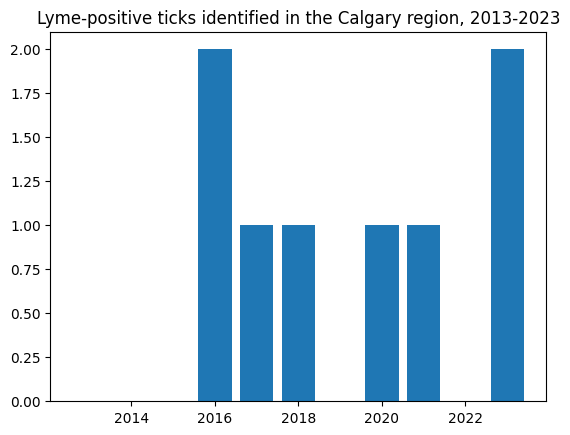

In [140]:
import matplotlib.pyplot as plt
count_ca = df[df['Program']=="BOTH"]
count_ca = count_ca[count_ca['Geography']=="Z2"]
count_ca = count_ca[['Count','Year']]
c = count_ca['Count']
y = count_ca['Year']
plt.bar(y,c)
plt.title('Lyme-positive ticks identified in the Calgary region, 2013-2023')

#### Calculating summary statistics
Using the merged data (*df_human*), this code calculates crude incidence (per 100,000 residents) for each zone and reports descriptive statistics across each year and zone combination.

In [141]:
df_human['ticks100k'] = df_human['Count']/df_human['Population']*100000
display(df_human.head())

,Geography,Year,Count,Population,ticks100k
0,Z1,2013,0.0,294022.0,0.0
1,Z1,2014,0.0,297327.0,0.0
2,Z1,2015,0.0,299087.0,0.0
3,Z1,2016,0.0,300423.0,0.0
4,Z1,2017,0.0,302927.0,0.0


In [142]:
df.describe()

,Year,Count,Total Ticks
count,165.000000,165.000000,165.000000
mean,2018.000000,1.903030,118.703030
std,3.171904,3.366304,91.194527
min,2013.000000,0.000000,0.000000
25%,2015.000000,0.000000,46.000000
50%,2018.000000,1.000000,105.000000
75%,2021.000000,2.000000,168.000000
max,2023.000000,21.000000,446.000000
